<a href="https://colab.research.google.com/github/brunoBenedicto/Estudos_Python/blob/main/dados_analise_das_aguas_do_rio_capibaribe_CPRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [ ]:
file_path = '/content/dadosCPRH.csv'  # arquivo
dados = pd.read_csv(file_path)




In [ ]:
dados

,Estacao,data,hora,Amônia mg/L,Coliformes Termotolerantes NMP/100mL,Condutividade Elétrica µS/cm,DBO mg/L,Fósforo Total mg/L,OD mg/L,pH,salinidade (%0),Temperatura ºC,Turbidez UNT
0,CB2-71,2009-02-05,11:15,NaN,700.0,482,1.3,0.05,5.5,7.0,0.2,26.0,1.0
1,CB2-71,2009-06-04,11:30,0.00,1100.0,376,0.7,0.17,5.4,8.0,0.2,26.0,55.0
2,CB2-71,2009-06-04,12:41,0.53,NaN,261,2.3,0.32,4.6,7.0,0.1,26.0,100.0
3,CB2-71,2009-08-06,10:50,0.00,2300.0,297,0.5,0.08,6.1,7.0,0.1,26.0,20.0
4,CB2-71,2009-10-08,10:55,0.00,900.0,389,1.2,0.04,6.0,7.0,0.2,29.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CB2-95,2017-08-02,14:15,3.52,160001.0,7887,7.5,0.75,1.4,8.0,4.3,27.0,13.0
83,CB2-95,2017-11-09,10:00,3.01,35000.0,34300,9.3,0.67,3.0,8.0,21.3,30.0,6.0
84,CB2-95,2018-02-01,09:45,7.50,160001.0,14310,10.4,0.92,1.2,8.0,8.2,30.0,15.0
85,CB2-95,2018-05-09,08:45,4.70,3900.0,11340,18.1,0.69,0.8,7.0,6.4,24.0,20.0


In [ ]:
print(dados.dtypes)


Estacao                                  object
data                                     object
hora                                     object
Amônia mg/L                             float64
Coliformes Termotolerantes NMP/100mL    float64
Condutividade Elétrica µS/cm              int64
DBO mg/L                                float64
Fósforo Total mg/L                      float64
OD mg/L                                 float64
pH                                      float64
salinidade (%0)                         float64
Temperatura ºC                          float64
Turbidez UNT                            float64
dtype: object


In [ ]:
dados['data']

0     2009-02-05
1     2009-06-04
2     2009-06-04
3     2009-08-06
4     2009-10-08
         ...    
82    2017-08-02
83    2017-11-09
84    2018-02-01
85    2018-05-09
86    2018-08-08
Name: data, Length: 87, dtype: object

In [ ]:
from datetime import datetime
# Combinando as colunas de data e hora em uma nova coluna 'data_completa'
dados['data'] = dados['data'] + ' ' + dados['hora']

# Convertendo a nova coluna 'data_completa' para o formato datetime
dados['data'] = pd.to_datetime(dados['data'], format='%Y-%m-%d %H:%M')


In [ ]:
dados = dados.drop(columns=['hora'])

In [ ]:
dados.dtypes

Estacao                                         object
data                                    datetime64[ns]
Amônia mg/L                                    float64
Coliformes Termotolerantes NMP/100mL           float64
Condutividade Elétrica µS/cm                     int64
DBO mg/L                                       float64
Fósforo Total mg/L                             float64
OD mg/L                                        float64
pH                                             float64
salinidade (%0)                                float64
Temperatura ºC                                 float64
Turbidez UNT                                   float64
dtype: object

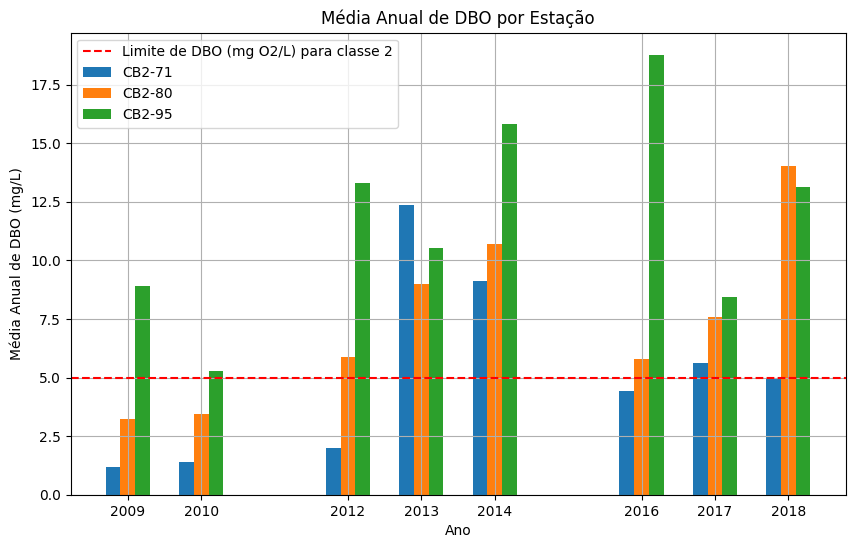

In [ ]:
# Calculando a média anual do DBO para cada estação
media_anual_dbo = dados.groupby(['ano', 'Estacao'])['DBO mg/L'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_dbo = media_anual_dbo.reset_index()

# Criando um gráfico de barras para mostrar a média anual do DBO por estação
plt.figure(figsize=(10, 6))
anos = media_anual_dbo['ano'].unique()
largura_barras = 0.2  # Largura das barras

for i, estacao in enumerate(media_anual_dbo['Estacao'].unique()):
    estacao_data = media_anual_dbo[media_anual_dbo['Estacao'] == estacao]
    posicoes = [ano + i * largura_barras for ano in anos]
    plt.bar(posicoes, estacao_data['DBO mg/L'], width=largura_barras, label=estacao)

plt.axhline(y=5, color='r', linestyle='--', label='Limite de DBO (mg O2/L) para classe 2')
plt.xlabel('Ano')
plt.ylabel('Média Anual de DBO (mg/L)')
plt.title('Média Anual de DBO por Estação')
plt.xticks([ano + 0.5 * (len(media_anual_dbo['Estacao'].unique()) - 1) * largura_barras for ano in anos], anos)
plt.legend()
plt.grid(True)
plt.show()

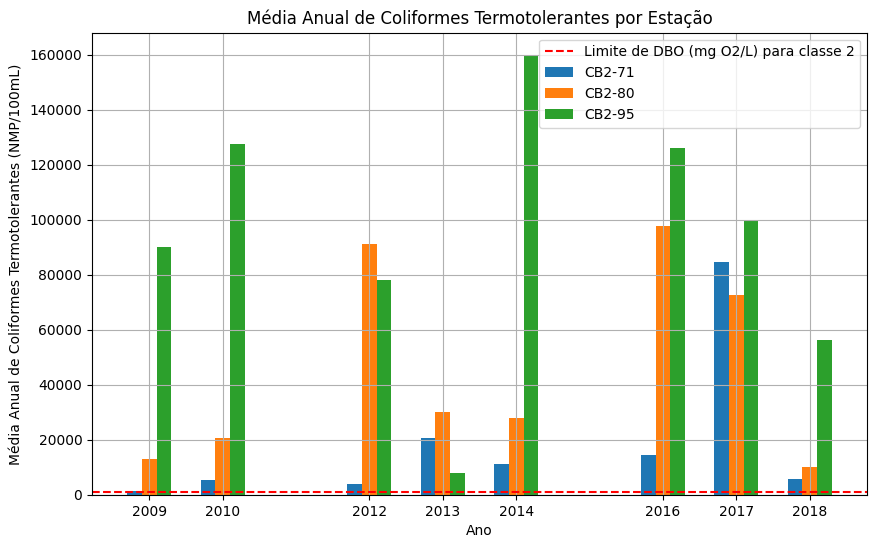

In [ ]:
 #Calculando a média anual de coliformes termotolerantes para cada estação
media_anual_coliformes = dados.groupby(['ano', 'Estacao'])['Coliformes Termotolerantes NMP/100mL'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_coliformes = media_anual_coliformes.reset_index()

# Criando um gráfico de barras para mostrar a média anual de coliformes termotolerantes por estação
plt.figure(figsize=(10, 6))
anos = media_anual_coliformes['ano'].unique()
largura_barras = 0.2  # Largura das barras

for i, estacao in enumerate(media_anual_coliformes['Estacao'].unique()):
    estacao_data = media_anual_coliformes[media_anual_coliformes['Estacao'] == estacao]
    posicoes = [ano + i * largura_barras for ano in anos]
    plt.bar(posicoes, estacao_data['Coliformes Termotolerantes NMP/100mL'], width=largura_barras, label=estacao)

plt.axhline(y=1000, color='r', linestyle='--', label='Limite de DBO (mg O2/L) para classe 2')
plt.xlabel('Ano')
plt.ylabel('Média Anual de Coliformes Termotolerantes (NMP/100mL)')
plt.title('Média Anual de Coliformes Termotolerantes por Estação')
plt.xticks([ano + 0.5 * (len(media_anual_coliformes['Estacao'].unique()) - 1) * largura_barras for ano in anos], anos)
plt.legend()
plt.grid(True)
plt.show()

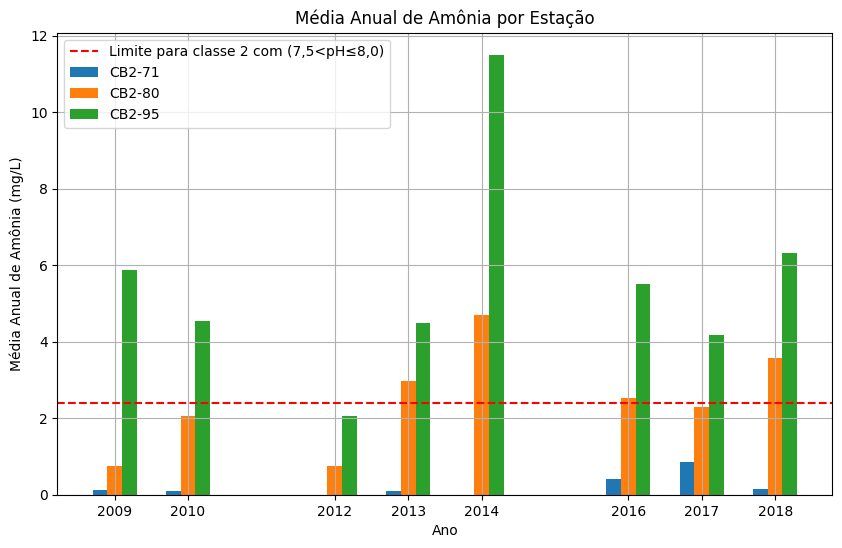

In [ ]:
# Extraindo o ano da coluna 'data'
dados['ano'] = dados['data'].dt.year

# Calculando a média anual de amônia para cada estação
media_anual_amonia = dados.groupby(['ano', 'Estacao'])['Amônia mg/L'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_amonia = media_anual_amonia.reset_index()

# Criando um gráfico de barras para mostrar a média anual de amônia por estação
plt.figure(figsize=(10, 6))
anos = media_anual_amonia['ano'].unique()
largura_barras = 0.2  # Largura das barras

for i, estacao in enumerate(media_anual_amonia['Estacao'].unique()):
    estacao_data = media_anual_amonia[media_anual_amonia['Estacao'] == estacao]
    posicoes = [ano + i * largura_barras for ano in anos]
    plt.bar(posicoes, estacao_data['Amônia mg/L'], width=largura_barras, label=estacao)
plt.axhline(y=2.4, color='r', linestyle='--', label='Limite para classe 2 com (7,5<pH≤8,0)')
plt.xlabel('Ano')
plt.ylabel('Média Anual de Amônia (mg/L)')
plt.title('Média Anual de Amônia por Estação')
plt.xticks([ano + 0.5 * (len(media_anual_amonia['Estacao'].unique()) - 1) * largura_barras for ano in anos], anos)
plt.legend()
plt.grid(True)
plt.show()

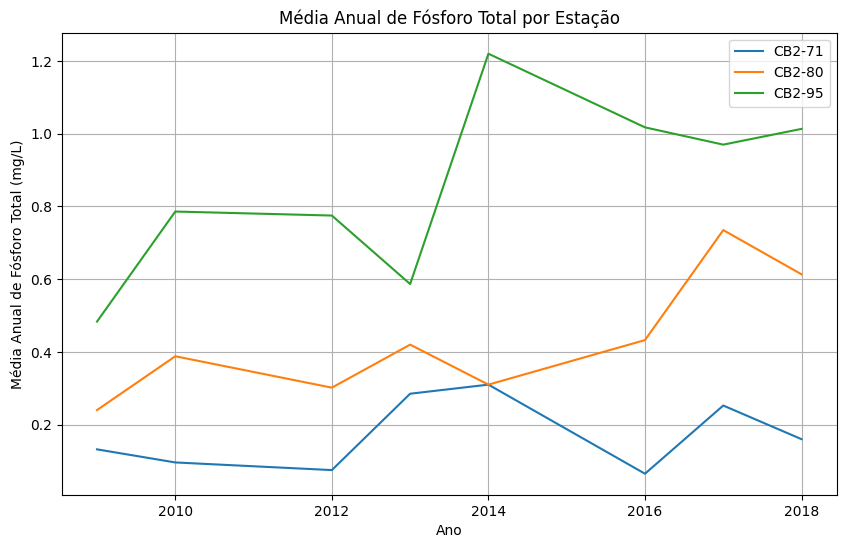

In [ ]:
# Calculando a média anual de fósforo total para cada estação
media_anual_fosforo = dados.groupby(['ano', 'Estacao'])['Fósforo Total mg/L'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_fosforo = media_anual_fosforo.reset_index()

# Criando um gráfico em linha para mostrar a média anual de fósforo total por estação
plt.figure(figsize=(10, 6))
for estacao in media_anual_fosforo['Estacao'].unique():
    estacao_data = media_anual_fosforo[media_anual_fosforo['Estacao'] == estacao]
    plt.plot(estacao_data['ano'], estacao_data['Fósforo Total mg/L'], label=estacao)

plt.xlabel('Ano')
plt.ylabel('Média Anual de Fósforo Total (mg/L)')
plt.title('Média Anual de Fósforo Total por Estação')
plt.legend()
plt.grid(True)
plt.show()

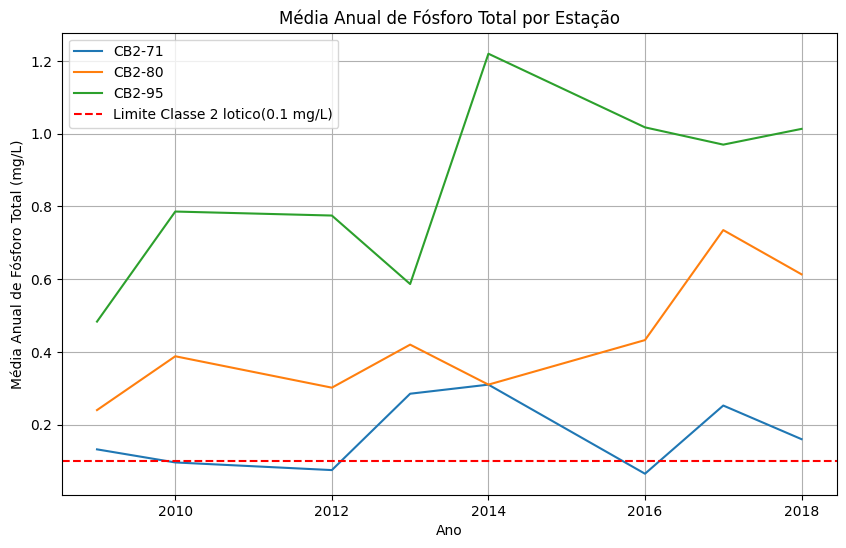

In [ ]:
# Calculando a média anual de fósforo total para cada estação
media_anual_fosforo = dados.groupby(['ano', 'Estacao'])['Fósforo Total mg/L'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_fosforo = media_anual_fosforo.reset_index()

# Criando um gráfico em linha para mostrar a média anual de fósforo total por estação
plt.figure(figsize=(10, 6))
for estacao in media_anual_fosforo['Estacao'].unique():
    estacao_data = media_anual_fosforo[media_anual_fosforo['Estacao'] == estacao]
    plt.plot(estacao_data['ano'], estacao_data['Fósforo Total mg/L'], label=estacao)

plt.xlabel('Ano')
plt.ylabel('Média Anual de Fósforo Total (mg/L)')
plt.title('Média Anual de Fósforo Total por Estação')
plt.legend()
plt.grid(True)

# Adicionando a linha horizontal do limite
plt.axhline(y=0.1, color='r', linestyle='--', label='Limite Classe 2 lotico(0.1 mg/L)')
plt.legend()

plt.show()



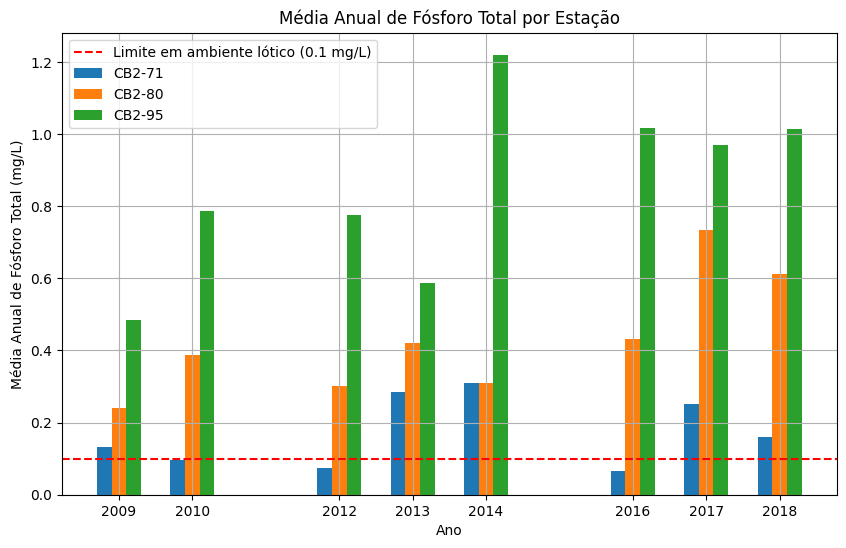

In [ ]:
# Extraindo o ano da coluna 'data'
dados['ano'] = dados['data'].dt.year

# Calculando a média anual de fósforo total para cada estação
media_anual_fosforo = dados.groupby(['ano', 'Estacao'])['Fósforo Total mg/L'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_fosforo = media_anual_fosforo.reset_index()

# Criando um gráfico de barras para mostrar a média anual de fósforo total por estação
plt.figure(figsize=(10, 6))
anos = media_anual_fosforo['ano'].unique()
largura_barras = 0.2  # Largura das barras

for i, estacao in enumerate(media_anual_fosforo['Estacao'].unique()):
    estacao_data = media_anual_fosforo[media_anual_fosforo['Estacao'] == estacao]
    posicoes = [ano + i * largura_barras for ano in anos]
    plt.bar(posicoes, estacao_data['Fósforo Total mg/L'], width=largura_barras, label=estacao)

plt.xlabel('Ano')
plt.ylabel('Média Anual de Fósforo Total (mg/L)')
plt.title('Média Anual de Fósforo Total por Estação')
plt.xticks([ano + 0.5 * (len(media_anual_fosforo['Estacao'].unique()) - 1) * largura_barras for ano in anos], anos)
plt.legend()
plt.grid(True)

# Adicionando a linha horizontal do limite
plt.axhline(y=0.1, color='r', linestyle='--', label='Limite em ambiente lótico (0.1 mg/L)')
plt.legend()

plt.show()

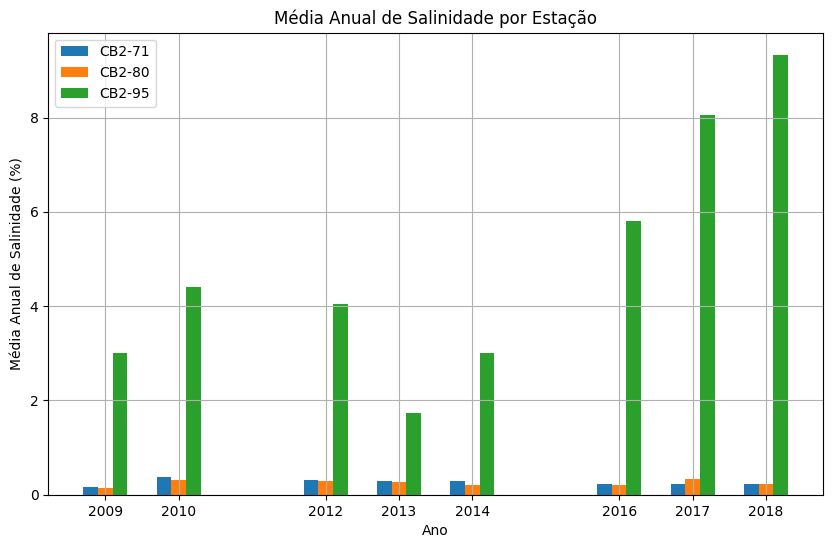

In [ ]:
# Calculando a média anual de salinidade para cada estação
media_anual_salinidade = dados.groupby(['ano', 'Estacao'])['salinidade (%0)'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_salinidade = media_anual_salinidade.reset_index()

# Criando um gráfico de barras para mostrar a média anual de salinidade por estação
plt.figure(figsize=(10, 6))
anos = media_anual_salinidade['ano'].unique()
largura_barras = 0.2  # Largura das barras

for i, estacao in enumerate(media_anual_salinidade['Estacao'].unique()):
    estacao_data = media_anual_salinidade[media_anual_salinidade['Estacao'] == estacao]
    posicoes = [ano + i * largura_barras for ano in anos]
    plt.bar(posicoes, estacao_data['salinidade (%0)'], width=largura_barras, label=estacao)

plt.xlabel('Ano')
plt.ylabel('Média Anual de Salinidade (%)')
plt.title('Média Anual de Salinidade por Estação')
plt.xticks([ano + 0.5 * (len(media_anual_salinidade['Estacao'].unique()) - 1) * largura_barras for ano in anos], anos)
plt.legend()
plt.grid(True)

plt.show()

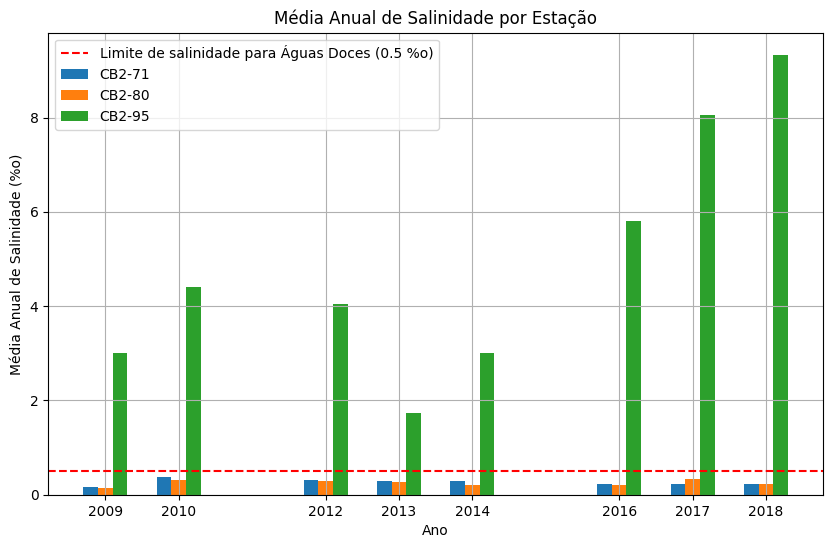

In [ ]:
# Extraindo o ano da coluna 'data'
dados['ano'] = dados['data'].dt.year

# Calculando a média anual de salinidade para cada estação
media_anual_salinidade = dados.groupby(['ano', 'Estacao'])['salinidade (%0)'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_salinidade = media_anual_salinidade.reset_index()

# Criando um gráfico de barras para mostrar a média anual de salinidade por estação
plt.figure(figsize=(10, 6))
anos = media_anual_salinidade['ano'].unique()
largura_barras = 0.2  # Largura das barras

for i, estacao in enumerate(media_anual_salinidade['Estacao'].unique()):
    estacao_data = media_anual_salinidade[media_anual_salinidade['Estacao'] == estacao]
    posicoes = [ano + i * largura_barras for ano in anos]
    plt.bar(posicoes, estacao_data['salinidade (%0)'], width=largura_barras, label=estacao)

# Adicionando as linhas para classificação de águas
plt.axhline(y=0.5, color='r', linestyle='--', label='Limite de salinidade para Águas Doces (0.5 %o)')


plt.xlabel('Ano')
plt.ylabel('Média Anual de Salinidade (%o)')
plt.title('Média Anual de Salinidade por Estação')
plt.xticks([ano + 0.5 * (len(media_anual_salinidade['Estacao'].unique()) - 1) * largura_barras for ano in anos], anos)
plt.legend()
plt.grid(True)

plt.show()

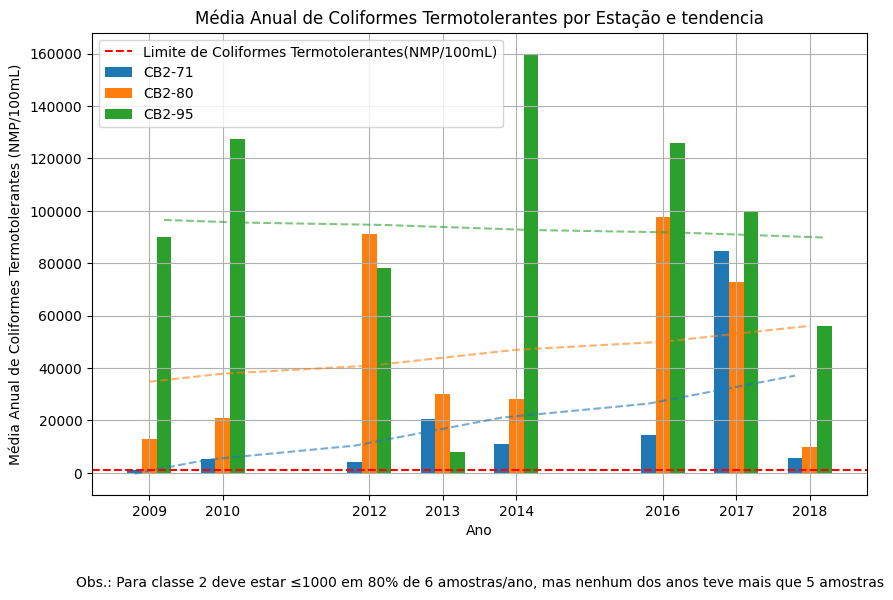

In [ ]:
# Ordenando os dados pelo tempo
dados = dados.sort_values(by='data')

# Calculando a média anual de coliformes termotolerantes para cada estação
media_anual_coliformes = dados.groupby(['ano', 'Estacao'])['Coliformes Termotolerantes NMP/100mL'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_coliformes = media_anual_coliformes.reset_index()

# Criando um gráfico de barras para mostrar a média anual de coliformes termotolerantes por estação
plt.figure(figsize=(10, 6))
anos = media_anual_coliformes['ano'].unique()
largura_barras = 0.2  # Largura das barras

for i, estacao in enumerate(media_anual_coliformes['Estacao'].unique()):
    estacao_data = media_anual_coliformes[media_anual_coliformes['Estacao'] == estacao]
    posicoes = [ano + i * largura_barras for ano in anos]
    plt.bar(posicoes, estacao_data['Coliformes Termotolerantes NMP/100mL'], width=largura_barras, label=estacao)

    # Calculando a reta de regressão linear
    x = np.arange(len(estacao_data))
    slope, intercept = np.polyfit(x, estacao_data['Coliformes Termotolerantes NMP/100mL'], 1)
    regression_line = slope * x + intercept
    plt.plot(posicoes, regression_line, '--', alpha=0.6)
plt.axhline(y=1000, color='r', linestyle='--', label='Limite de Coliformes Termotolerantes(NMP/100mL)')
plt.xlabel('Ano')
plt.ylabel('Média Anual de Coliformes Termotolerantes (NMP/100mL)')
plt.title('Média Anual de Coliformes Termotolerantes por Estação e tendencia')
plt.xticks([ano + 0.5 * (len(media_anual_coliformes['Estacao'].unique()) - 1) * largura_barras for ano in anos], anos)
plt.legend()
plt.grid(True)
plt.text(0.5, -0.2, 'Obs.: Para classe 2 deve estar ≤1000 em 80% de 6 amostras/ano, mas nenhum dos anos teve mais que 5 amostras', ha='center', transform=plt.gca().transAxes, fontsize=10)
plt.show()

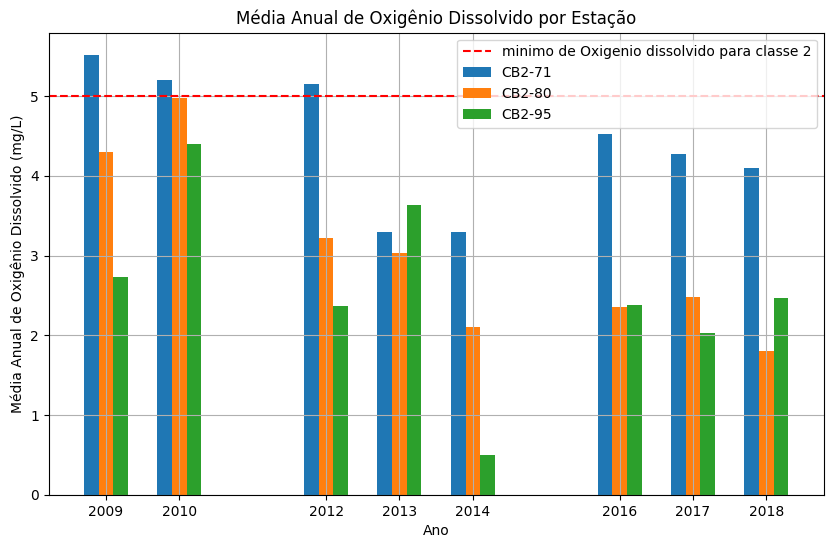

In [ ]:
# Calculando a média anual de OD para cada estação
media_anual_od = dados.groupby(['ano', 'Estacao'])['OD mg/L'].mean()

# Resetando o índice para transformar os grupos em colunas
media_anual_od = media_anual_od.reset_index()

# Criando um gráfico de barras para mostrar a média anual de OD por estação
plt.figure(figsize=(10, 6))
anos = media_anual_od['ano'].unique()
largura_barras = 0.2  # Largura das barras

for i, estacao in enumerate(media_anual_od['Estacao'].unique()):
    estacao_data = media_anual_od[media_anual_od['Estacao'] == estacao]
    posicoes = [ano + i * largura_barras for ano in anos]
    plt.bar(posicoes, estacao_data['OD mg/L'], width=largura_barras, label=estacao)
plt.axhline(y=5, color='r', linestyle='--', label='minimo de Oxigenio dissolvido para classe 2')
plt.xlabel('Ano')
plt.ylabel('Média Anual de Oxigênio Dissolvido (mg/L)')
plt.title('Média Anual de Oxigênio Dissolvido por Estação')
plt.xticks([ano + 0.5 * (len(media_anual_od['Estacao'].unique()) - 1) * largura_barras for ano in anos], anos)
plt.legend()
plt.grid(True)
plt.show()